In [1]:
import os,cv2
import matplotlib.pyplot as plt
import numpy as npy

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import adam
from keras.callbacks import EarlyStopping

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

Using TensorFlow backend.


In [2]:
image_rows = 200
image_cols = 200
n_channel = 1

In [3]:
image_data_list= []
data_path = ('./swedish dataset/')
data_directory_list = os.listdir(data_path)

In [4]:
for dataset in data_directory_list:
    image_list = os.listdir(data_path+'/'+dataset)
    print('Images folder loaded '+'{}\n'.format(dataset))
    
    for image in image_list:
        input_image = cv2.imread(data_path+'/'+ dataset+'/'+ image)
        input_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
        #input_image = cv2.resize(input_image,(100,100)).flatten()
        input_image_resized = cv2.resize(input_image,(200,200))
        image_data_list.append(input_image_resized)

Images folder loaded A

Images folder loaded B

Images folder loaded C

Images folder loaded D

Images folder loaded E

Images folder loaded F

Images folder loaded G

Images folder loaded H

Images folder loaded I

Images folder loaded J

Images folder loaded K

Images folder loaded L

Images folder loaded M

Images folder loaded N

Images folder loaded O



In [5]:
image_dataset = npy.array(image_data_list)
image_dataset = image_dataset.astype('float32')
image_dataset /= 255
print(image_dataset.shape)

(1110, 200, 200)


In [6]:
image_dataset_scaled = image_dataset.reshape(image_dataset.shape[0], image_rows, image_cols, n_channel)
print(image_dataset_scaled.shape)

(1110, 200, 200, 1)


In [7]:
number_of_classes = 15

number_of_samples = image_dataset_scaled.shape[0]
labels =npy.ones((number_of_samples,),dtype = 'int64')

labels[0:73]= 0
labels[73:147] = 1
labels[147:221] = 2
labels[221:295] = 3
labels[295:369] = 4
labels[369:443] = 5
labels[443:517] = 6
labels[517:591] = 7
labels[591:665] = 8
labels[665:739] = 9
labels[739:813] = 10
labels[813:887] = 11
labels[887:961] = 12
labels[961:1035] = 13
labels[1035:1109] = 14

names = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']

print(number_of_samples)

1110


In [8]:
class_label = np_utils.to_categorical(labels, number_of_classes)

X,Y = shuffle(image_dataset_scaled, class_label)

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

input_shape = X_train[0].shape

print(X_train.shape)

(888, 200, 200, 1)


In [77]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(number_of_classes))
model.add(Activation('softmax'))
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
        restore_best_weights=True)
model.compile(loss='categorical_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [78]:
hist = model.fit(X_train, y_train, batch_size=20, epochs=10, verbose=1, validation_split=0.2, callbacks=[monitor])

Train on 710 samples, validate on 178 samples
Epoch 1/10
710/710 [==============================] - 21s 30ms/step - loss: 3.4176 - acc: 0.1845 - val_loss: 2.2074 - val_acc: 0.3596
Epoch 2/10
710/710 [==============================] - 20s 28ms/step - loss: 1.4568 - acc: 0.5803 - val_loss: 1.1041 - val_acc: 0.7135
Epoch 3/10
710/710 [==============================] - 21s 29ms/step - loss: 0.6536 - acc: 0.8070 - val_loss: 0.9009 - val_acc: 0.7416
Epoch 4/10
710/710 [==============================] - 21s 29ms/step - loss: 0.3694 - acc: 0.9014 - val_loss: 0.9012 - val_acc: 0.7303
Epoch 5/10
710/710 [==============================] - 21s 30ms/step - loss: 0.2157 - acc: 0.9394 - val_loss: 0.7079 - val_acc: 0.8090
Epoch 6/10
710/710 [==============================] - 21s 29ms/step - loss: 0.1410 - acc: 0.9592 - val_loss: 0.8526 - val_acc: 0.7865
Epoch 7/10
710/710 [==============================] - 21s 29ms/step - loss: 0.0797 - acc: 0.9859 - val_loss: 0.8266 - val_acc: 0.8090
Epoch 8/10
710/7

In [62]:
 print(hist.history.keys()) 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


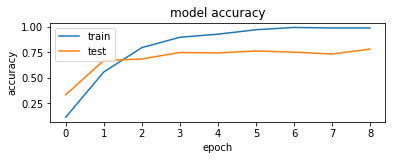

In [63]:
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(hist.history['acc'])  
plt.plot(hist.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')

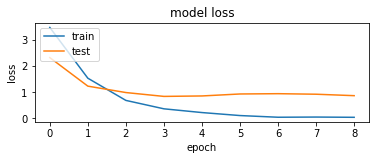

In [64]:
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(hist.history['loss'])  
plt.plot(hist.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [66]:
Y_pred = model.predict(X_test)
#print(Y_pred)

y_pred = npy.argmax(Y_pred, axis=1)
#print(y_pred)

target_names = ['class 0(1)', 'class 1(2)','class 2(3)', 'class 3(4)','class 4(5)', 'class 5(6)','class 6(7)', 'class 7(8)','class 8(9)',
                'class 9(10)','class 10(11)','class 11(12)','class 12(13)','class 13(14)','class 14(15)']

print(classification_report(npy.argmax(y_test, axis=1), y_pred, target_names = target_names))
print(confusion_matrix(npy.argmax(y_test, axis=1), y_pred))
cnf_matrix = (confusion_matrix(npy.argmax(y_test, axis=1), y_pred))

              precision    recall  f1-score   support

  class 0(1)       0.60      0.40      0.48        15
  class 1(2)       1.00      0.70      0.82        10
  class 2(3)       0.53      0.75      0.62        12
  class 3(4)       1.00      0.93      0.96        14
  class 4(5)       0.76      0.87      0.81        15
  class 5(6)       0.54      0.93      0.68        14
  class 6(7)       1.00      0.94      0.97        18
  class 7(8)       0.93      0.81      0.87        16
  class 8(9)       0.58      0.39      0.47        18
 class 9(10)       0.94      1.00      0.97        15
class 10(11)       0.50      0.79      0.61        14
class 11(12)       0.81      0.68      0.74        25
class 12(13)       0.92      0.92      0.92        13
class 13(14)       0.92      0.73      0.81        15
class 14(15)       0.86      0.75      0.80         8

    accuracy                           0.77       222
   macro avg       0.79      0.77      0.77       222
weighted avg       0.79   

In [67]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = npy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


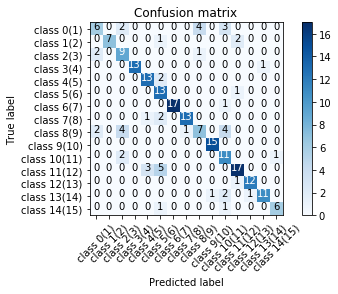

In [68]:
plot_confusion_matrix(cnf_matrix, classes = target_names, title ='Confusion matrix')

In [69]:
score, accuracy = model.evaluate(X_test, y_test, batch_size=20)

222/222 [==============================] - 1s 5ms/step


In [70]:
print('Test Score:',score)
print('Test accuracy:',accuracy)

Test Score: 0.8353182775480253
Test accuracy: 0.7657657593220204


In [71]:
from keras.models import load_model

model.save('plant.h5')
print('model saved as')

model saved as


In [72]:
MODEL_PATH = 'plant.h5'
model = load_model(MODEL_PATH)
model._make_predict_function()  

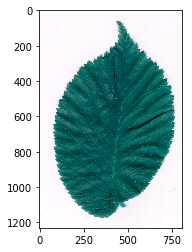

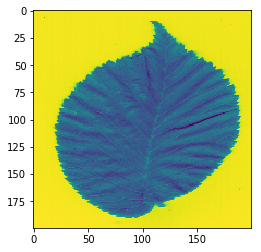

(200, 200)


In [73]:
input_image = cv2.imread('swedish dataset test/l1nr075.tif')
plt.imshow(input_image)
plt.show()

input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

input_image = cv2.resize(input_image,(200,200))
plt.imshow(input_image)
plt.show()

input_image = npy.array(input_image)
input_image = input_image.astype('float32')
input_image /= 255

print(input_image.shape)

In [74]:
input_image = npy.expand_dims(input_image, axis= 0)
input_image = npy.expand_dims(input_image, axis= 3)
print(input_image.shape)

(1, 200, 200, 1)


In [75]:
new_prediction = model.predict_classes(input_image, batch_size = 15)

In [76]:
print('------------------------------------------------------------')
print('Class:',new_prediction)
print('------------------------------------------------------------')

------------------------------------------------------------
Class: [0]
------------------------------------------------------------
